In [53]:
import os 
import pandas as pd 
from matplotlib import pyplot as plt
from PIL import Image

In [62]:
csv_path = 'logs/test-dann/log.csv'
df = pd.read_csv(csv_path) 
df.head()

,train_loss_enc,train_loss_disc,train_dice_loss,train_ssim_loss,train_bce_loss,dice_loss
0,0.6690,0.6934,0.9734,0.9981,0.6805,0.9728
1,0.6705,0.6935,0.9720,0.9980,0.6621,0.9720
2,0.6730,0.6935,0.9771,0.9979,0.6489,0.9716
3,0.6764,0.6934,0.9738,0.9974,0.6327,0.9714
4,0.6822,0.6931,0.9756,0.9974,0.6159,0.9716


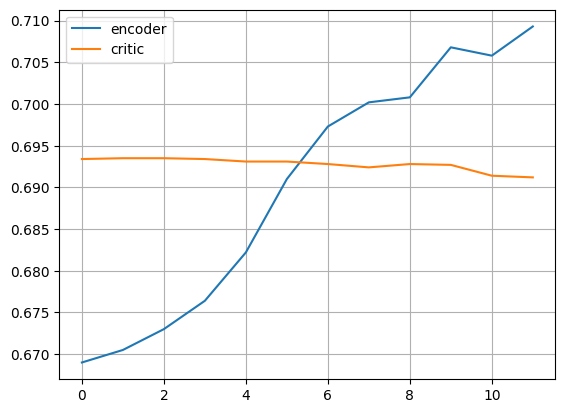

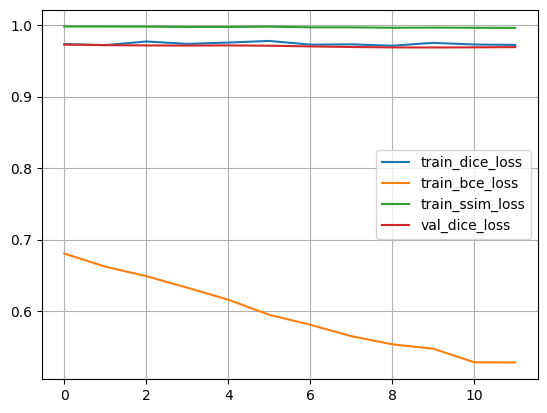

<Figure size 640x480 with 0 Axes>

In [67]:
plt.plot(df['train_loss_enc'], label = 'encoder')
plt.plot(df['train_loss_disc'], label = 'critic')
plt.legend() 
plt.grid()
plt.show()
plt.savefig('dann_loss.png')

plt.plot(df['train_dice_loss'], label='train_dice_loss')
plt.plot(df['train_bce_loss'], label='train_bce_loss')
plt.plot(df['train_ssim_loss'], label='train_ssim_loss')
plt.plot(df['dice_loss'], label='val_dice_loss')
plt.legend() 
plt.grid()
plt.show()
plt.savefig('seg_loss.png')


In [56]:
from torchvision.transforms import v2 
import torch 
transform = v2.Compose([v2.RandomHorizontalFlip(0.5),
                                     v2.RandomVerticalFlip(0.5),
                                     v2.ToImage(), 
                                     v2.ToDtype(torch.float32, scale=True)])
 

In [57]:
csv_path = '../org_data/csv_files/org_train_79.csv' 
df = pd.read_csv(csv_path) 
df.head()

,Unnamed: 0,patient_id,idx,aster_img_path,aster_mask_path,img_path,mask_path
0,0,MEDVID0001_M_20210908_130347_0001_IMAGES,0,./MEDVID0001_M_20210908_130347/MEDVID0001_M_20...,./MEDVID0001_M_20210908_130347/MEDVID0001_M_20...,MEDVID0001_M_20210908_130347_0001_IMAGES/0/img...,MEDVID0001_M_20210908_130347_0001_IMAGES/0/mas...
1,1,MEDVID0001_M_20210908_130347_0001_IMAGES,1,./MEDVID0001_M_20210908_130347/MEDVID0001_M_20...,./MEDVID0001_M_20210908_130347/MEDVID0001_M_20...,MEDVID0001_M_20210908_130347_0001_IMAGES/1/img...,MEDVID0001_M_20210908_130347_0001_IMAGES/1/mas...
2,2,MEDVID0001_M_20210908_130347_0001_IMAGES,10,./MEDVID0001_M_20210908_130347/MEDVID0001_M_20...,./MEDVID0001_M_20210908_130347/MEDVID0001_M_20...,MEDVID0001_M_20210908_130347_0001_IMAGES/10/im...,MEDVID0001_M_20210908_130347_0001_IMAGES/10/ma...
3,3,MEDVID0001_M_20210908_130347_0001_IMAGES,100,./MEDVID0001_M_20210908_130347/MEDVID0001_M_20...,./MEDVID0001_M_20210908_130347/MEDVID0001_M_20...,MEDVID0001_M_20210908_130347_0001_IMAGES/100/i...,MEDVID0001_M_20210908_130347_0001_IMAGES/100/m...
4,4,MEDVID0001_M_20210908_130347_0001_IMAGES,101,./MEDVID0001_M_20210908_130347/MEDVID0001_M_20...,./MEDVID0001_M_20210908_130347/MEDVID0001_M_20...,MEDVID0001_M_20210908_130347_0001_IMAGES/101/i...,MEDVID0001_M_20210908_130347_0001_IMAGES/101/m...


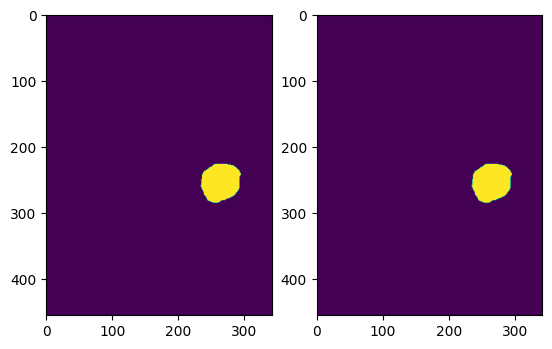

In [58]:
import random
idx = random.randint(0, len(df))
img_path = '../org_data/' + df.img_path[idx]
mask_path = '../org_data/' + df.mask_path[idx] 
img = Image.open(img_path) 
mask = Image.open(mask_path) 
torch.manual_seed(idx)
img = transform(mask)
torch.manual_seed(idx)
mask = transform(mask) 
img.shape, mask.shape 



plt.subplot(1,2, 1)
plt.imshow(img[0])
plt.subplot(1,2, 2)
plt.imshow(mask[0])
plt.show()